# Analysis of TMDB Movie dataset
### Contents
- Data cleaning and management
- Can budgetless movies sell?
- What is the dispersion between women and non-women directed movies?
- Are woman-directed movies less popular?
- Do women directed movies receive less budget? What about revenue?

## 1. Data cleaning and management

### Importing and loading the data

In [2]:
import numpy as np  # Import the numpy library for numerical operations
import seaborn as sns  # Import the seaborn library for data visualization
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib for plotting
import pandas as pd  # Import the pandas library for data manipulation and analysis
import ast  # Import the ast module for working with literal_eval functions

# Define the file name
movies = "tmdb_movies.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(movies)

### Extracting values from dictionary columns

In [3]:
# Function to extract genres for each datapoint
def extract_genres(x): 
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] # Empty list to store the genres
    
#Iterate through each dictionary
    for item in x: # Iterate for each dictionary in our list
        Genres.append(item['name']) # Grab the 'name' key for each dictionary
    
    return Genres #Return the Genres

# Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [4]:
## Function to extract production companies for each datapoint
def extract_prod_comp(x): 
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    Production_Companies = [] # Empty list to store the production companies
    
#Iterate through each dictionary 
    for item in x: # iterate for each dictionary in our list
        Production_Companies.append(item['name']) # Grab the 'name' key for each dictionary
        
    return Production_Companies #Return the Production Companies

# Apply the function to production companies
df['extracted_production_companies'] = df['production_companies'].apply(extract_prod_comp)

In [5]:
# Function to extract production countries for each datapoint
def extract_prod_countries(x): 
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    Production_Countries = [] # Empty list to store the production countries
    
#Iterate through each dictionary
    for item in x: # iterate for each dictionary in our list
        Production_Countries.append(item['name']) # Grab the 'name' key for each dictionary
    
    return Production_Countries #Return the Production Countries

# Apply the function to production countries
df['extracted_production_countries'] = df['production_countries'].apply(extract_prod_countries)

In [6]:
# Function to extract keywords for each datapoint
def extract_keywords(x): 
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    Keywords = [] # Empty list to store the keywords
    
#Iterate through each dictionary 
    for item in x: # iterate for each dictionary in our list
        Keywords.append(item['name']) # Grab the 'name' key for each dictionary
        
    return Keywords # Return the Keywords

# Apply the function to keywords
df['extracted_keywords'] = df['keywords'].apply(extract_keywords)

In [7]:
# Function to extract spoken langauges for each datapoint
def extract_spoken_languages(x): 
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    Spoken_Languages = [] # Empty list to store the spoken langauges
    
#Iterate through each dictionary 
    for item in x: # iterate for each dictionary in our list
        Spoken_Languages.append(item['name']) # Grab the 'name' key for each dictionary
        
    return Spoken_Languages #Return the Spoken Langauges

## Apply the function to spoken langauges
df['extracted_spoken_languages'] = df['spoken_languages'].apply(extract_spoken_languages)

### Looking for duplicate movie id's

In [460]:
df.id.nunique() #Dispay number of unique movie id's

4803

In [461]:
df.shape #Display the number of rows and column of our dataset

(4803, 25)

##### Notice that the number of unique id's matches the number of rows. It means that all movie id's in the dataset are unique and further cleaning is not needed.

### Handling  missing values

##### Demonstating the number and percentage of missing values for each column

In [463]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending
null_vals(df) #Display the table

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
status,0,0.000
extracted_keywords,0,0.000
extracted_production_countries,0,0.000
extracted_production_companies,0,0.000


##### Since informtion about movies' homepage, tagline, overview and runtime will not be used in this analysis, I ignore the missing values. 
##### Looking for the movie, which does not have its release date

In [464]:
df[df.release_date.isnull()] #Display the movie with missing values in release_date

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_production_companies,extracted_production_countries,extracted_keywords,extracted_spoken_languages
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,[],[],[],[],[]


##### Since there is only 1 missing value in release_date column and the data about the movie are not informative for this analysis, I remove the movie from the datset.

In [8]:
# Drop rows with missing values in the 'release_date' column
df.dropna(subset=['release_date'], inplace=True)

## 2. Can budgetless movies sell?

### Ones of the most important factors describing the success of a movie are recognition and profitability. The latter is easier to measure.

### To investigate this at first I need to look at the distribution of the budget 

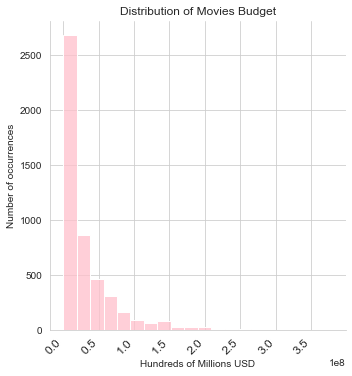

In [474]:
#Create a distribution plot, displaying budget
sns.displot(x='budget', #Set the x-axis
            data=df, #Set the dataset
            bins=20, #Set the number of bins
            color='pink') #Make the bars pink

plt.xticks(rotation=45, # Set x-axis tick labels rotation
           horizontalalignment='right', # Set x-axis tick labels alignment to the right
           fontweight='light', # Set x-axis tick font weight to light
           fontsize='large') # Set x-axis tick labels size to large

# Set x-axis label
plt.xlabel('Hundreds of Millions USD')

# Set y-axis label
plt.ylabel('Number of occurrences')

# Set plot title
plt.title('Distribution of Movies Budget')

# Display the plot
plt.show()


##### The graph demonstrates the distribution of our movies' budget. Interestigly, the largest chunk of movies in this dataset have a budget of around 0.
##### To answer the main question, I want to see if there any budgetless movies that made positive revenue.

### Checking the distribution of revenue for budgetless movies

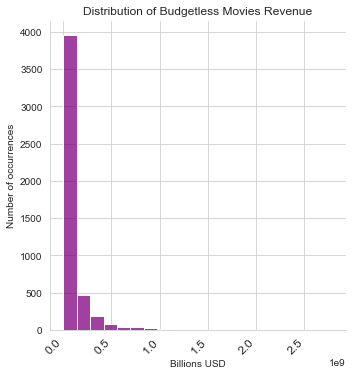

In [59]:
#Create a distribution plot, displaying revenue
sns.displot(x='revenue', #Set the x-axis
            data=df, #Set the dataset
            bins=20, #Set the number of bins
            color='purple') #Make the bars purple

plt.xticks(rotation=45, # Set x-axis tick labels rotation
           horizontalalignment='right', # Set x-axis tick labels alignment to the right
           fontweight='light', # Set x-axis tick font weight to light
           fontsize='large') # Set x-axis tick labels size to large

# Set x-axis label
plt.xlabel('Billions USD')

# Set y-axis label
plt.ylabel('Number of occurrences')

# Set plot title
plt.title('Distribution of Budgetless Movies Revenue')

# Display the plot
plt.show()

##### From the plot we can notice that indeed there are some movies, which made positive revenue, regardless of their budget being 0. Since it seems suspicious, I investigate further.  

### Finding a movie, which made the most revenue with 0 budget

In [481]:
zero_budget_movies = df[df.budget == 0] #Create a dataset only with movies, which budget was set to 0

In [483]:
#Check what movie with 0 budget produced the most revenue
zero_budget_movies[zero_budget_movies.revenue == zero_budget_movies.revenue.max()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_production_companies,extracted_production_countries,extracted_keywords,extracted_spoken_languages
691,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://video.movies.go.com/wildhogs/,11199,"[{""id"": 1599, ""name"": ""midlife crisis""}, {""id""...",en,Wild Hogs,"Restless and ready for adventure, four suburba...",31.719463,"[{""name"": ""Wild Hogs Productions"", ""id"": 6354}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-03-02,253625427,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A lot can happen on the road to nowhere.,Wild Hogs,5.6,648,"[Action, Adventure, Comedy]","[Wild Hogs Productions, Touchstone Pictures]",[United States of America],"[midlife crisis, road trip, politically incorr...",[English]


##### According to the dataset a budgetless movie, which produced the most revenue is 'Wild Hogs'. However, it seems unbelievable and I look for answers in Wikipedia.
##### According to Wikipedia, Wild Hogs had a way higher budget than zero, to be precise - 60 millions USD.

[Source](https://en.wikipedia.org/wiki/Wild_Hogs)

### Conclusion
##### Short answer to the question 'Can budgetless movie sell?': unlikely. 
##### From the analysis I can speculate that some of the movies did have a higher budget than 0, however, the values were not specified in this datset and simply set to 0. Unfortunately, I cannot determine which movies acctually did not have any budget and which budget's values were missing. 

### Are there any missing values in revenue too?
### To investigate this I repeat the process

In [484]:
zero_revenue_movies = df[df.revenue == 0] #Create a dataset only with movies, which revenue is set to 0

In [485]:
#Check what movie with 0 budget produced the most revenue
zero_revenue_movies[zero_revenue_movies.budget == zero_revenue_movies.budget.max()] 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_production_companies,extracted_production_countries,extracted_keywords,extracted_spoken_languages
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[Drama, Horror, Thriller]","[Universal Pictures, Stuber Productions, Relat...",[United States of America],"[father son relationship, victorian england, r...",[English]


##### According to the data, a movie, which had the largest budget and 0 revenue was 'The Wolfman'. Wikipedia says that, althougth it wasn't profitable, the movie made 142.6 millions USD in revenue. 

[Source](https://en.wikipedia.org/wiki/The_Wolfman_(film))

##### It is evident that in this dataset both budget and revenue have missing values set to 0, which prevents us from analysing it further.  

## 3. What is the dispersion between women and non-women directed movies?

### The question is important to analyse because women involvment in high-qualification positions within the movie industry has always been questionable.

### Looking for woman-directed movies

##### The women-directed movies' analysis idea came from exploration of keywords in the dataset. It is important to note that one of the most prominent limitations in women-directed movie analysis is that we cannot assume that all movies, which were directed by women, appear in keywords. Therefore, this dataset might have some more women-directed movies.
##### At first I want to see how many occurences of women director keyword can be found in the dataset.

In [486]:
# The 'explode' function is used to expand a column that contains lists or arrays into multiple rows,
# where each element in the list or array gets its own row. In this case, the 'extracted_keywords' column is exploded.
exploded = df.explode('extracted_keywords')

# The 'value_counts' function is used to count the occurrences of each unique element in the 'extracted_keywords' column.
# It returns a Series object with the elements as the index and their respective counts as the values.

counts = exploded['extracted_keywords'].value_counts()

# The 'head' function is used to display the first few rows of the 'counts' Series, with a default of 5 rows.
# By passing the argument '10' to 'head', it displays the first 10 rows of the Series.
# This line prints the top 10 most frequent keywords and their corresponding counts.
print(counts.head(10))


woman director          324
independent film        318
duringcreditsstinger    307
based on novel          197
murder                  189
aftercreditsstinger     170
violence                150
dystopia                139
sport                   126
revenge                 118
Name: extracted_keywords, dtype: int64


##### The dataset has 324 movies with keyword - 'woman_directed', it is the most frequent keyword.

##### Since there is no column, which directly measures, whether a movie was directed by a woman, I attempt to retrieve it from movies' keywords.

In [9]:
# The line adds a new column 'is_woman_director' to the DataFrame 'df' based on the values in the 'extracted_keywords' column.
# The 'apply' function is used to apply a lambda function to each value in the 'extracted_keywords' column.

# The lambda function checks if the string 'woman director' is present in each value of 'extracted_keywords'.
# If 'woman director' is found, it returns 1; otherwise, it returns 0.

# The result of the lambda function is assigned to the 'is_woman_director' column, indicating whether a movie has a woman director.
df['is_woman_director'] = df['extracted_keywords'].apply(lambda x: 1 if 'woman director' in x else 0)

### How does women-director distribution look like over time? 

##### At first I extract the year from movies' release date to make the following plots more readable.

In [11]:
#Change the release_date data type to date (it was object).
df.release_date = df.release_date.astype('datetime64')
# Extract year from release_date and adding it to the dataset
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

##### Plotting the ocurrences, when movie director was a woman over the years.

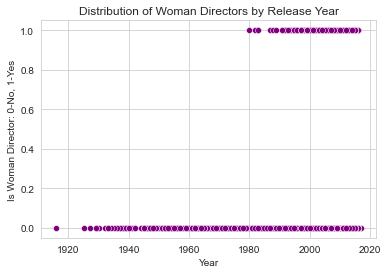

In [58]:
sns.scatterplot(x='release_year', # The 'release_year' column is assigned to the x-axis 
                y='is_woman_director', # The 'is_woman_director' column is assigned to the y-axis
                data=df, # The data is provided from the DataFrame 'df'
                color='purple') # The scatterplot is set to be purple in color.

# Set the x-axis label to 'Release Year'.
plt.xlabel('Year')

# Set the y-axis label to 'Is Woman Director'.
plt.ylabel('Is Woman Director: 0-No, 1-Yes')

# Set the title of the plot to 'Distribution of Woman Directors by Release Year'.
plt.title('Distribution of Woman Directors by Release Year')

# Display the plot.
plt.show()


##### From the plot it is possible to notice that this dataset has no woman-director keywords for movies before 1980. It is likely that there aren't any women directed movies before that date (in this dataset).

### Has the situation changed in this century?

##### Since there are no movies in this dataset, which had a keyword 'woman-director' before 1980, I define a dataset between year 1980 and 1999. It will represent women involvment in the previous century. 

In [12]:
# The line creates a new DataFrame 'df1' by filtering the original DataFrame 'df' based on certain conditions.

# The conditions are specified within the square brackets [].
# It checks if the values in the 'release_year' column are greater than 1980 and less than 2000.

# The '&' operator is used to combine the two conditions, indicating that both conditions must be true for a row to be included in 'df1'.

# The resulting DataFrame 'df1' contains rows where the 'release_year' is between 1980 and 2000 (exclusive).
df1 = df[(df.release_year > 1980) & (df.release_year < 2000)] 

##### Visualizing the percentage of woman-director keyword in the dataset between year 1980-1999

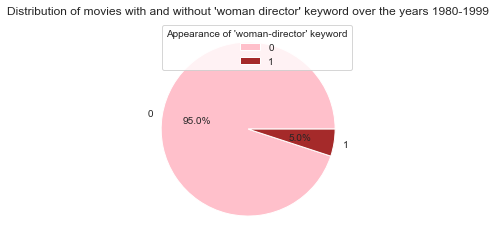

In [60]:
# Count the occurrences of each category in the 'is_woman_director' column in the filtered DataFrame 'df1'.

counts1 = df1['is_woman_director'].value_counts()

# Create a pie chart 

plt.pie(counts1, 
        labels=counts1.index, # The 'counts' series is used as the data, labels are set to 'counts.index' (the categories)
        autopct='%1.1f%%', # Autopct specifies the percentage format.
        colors=['pink', 'brown']) # Mmake the slices pink and purple.


plt.legend(counts1.index, # Add a legend using the categories from 'counts.index'.
           title="Appearance of 'woman-director' keyword")# The title of the legend is set to "Appearance of 'woman director' keyword".

# Set the title of the pie chart.

plt.title("Distribution of movies with and without 'woman director' keyword over the years 1980-1999")


# Display the chart.
plt.show()

##### From the graph we can see that the proportion of movies, having woman-directed keyword, between years 1980 and 1999 is 5 %. 
##### Now i want to compare the percantage with one between years 2000 and 2017 (2017 is the last release year in the dataset). It will represent woman-director keyword appearance in this century.

In [25]:
# The line creates a new DataFrame 'df2' by filtering the original DataFrame 'df' based on a condition.

# The condition is specified within the square brackets [].
# It checks if the values in the 'release_year' column are greater than or equal to 2000.

# The resulting DataFrame 'df2' contains rows where the 'release_year' is greater than or equal to 2000.

df2 = df[df.release_year >= 2000]

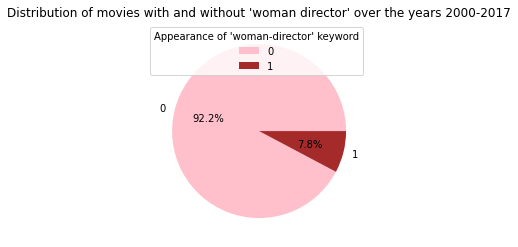

In [33]:
# Count the occurrences of each category in the 'is_woman_director' column in the filtered DataFrame 'df1'.

counts2 = df2['is_woman_director'].value_counts()

# Create a pie chart 

plt.pie(counts2, 
        labels=counts2.index, # The 'counts' series is used as the data, labels are set to 'counts.index' (the categories)
        autopct='%1.1f%%', # Autopct specifies the percentage format.
        colors=['pink', 'brown']) # Mmake the slices pink and purple.


plt.legend(counts2.index, # Add a legend using the categories from 'counts.index'.
           title="Appearance of 'woman-director' keyword")# The title of the legend is set to "Appearance of 'woman director' keyword".

# Set the title of the pie chart.

plt.title("Distribution of movies with and without 'woman director' over the years 2000-2017")


# Display the chart.
plt.show()

##### In the years between 2000 and 2017 the proportion of movies with 'woman-directed' keyword has grown slightly compared with the years 1980-1999. It now stands at 7.8%.

### Concusion
##### To answer the question 'What is the dispersion between woman and non-woman directed movies?' I cannot answer with certainty, having results from this dataset, because it is likely that some woman-directed movies simply did not have a keyword 'woman director'. Moreover, I cannot generalize the answer, since the dataset does not include all or at least a major proportion of total movies.

##### Looking at the percentage of woman-directed keyword in movies from this century it is somewhat consistent with the past studies. A research on the dispersion of woman and man directors between 2007 and 2023 reveal that the proportion of woman directors is 6 %.

[Source](https://annenberg.usc.edu/news/research-and-impact/was-2023-year-woman-director-survey-says…-no)

## 4. Are woman-directed movies less popular?

##### The recognition of a movie can be partially determined by its popularity among the population. Analyzing the popularity of woman-directed movies we can check if movies directed by women are recognized by the public similarly to non-woman. 
##### To investigate the last 2 questions I will use the first movie in this dataset, which has woman-director keyword and the latest one. 
### Looking for the first movie, which has a 'woman-directed' keyword

In [34]:
# The first condition checks if the values in the 'is_woman_director' column are equal to 1, indicating a woman director.
# The second condition checks if the values in the 'release_year' column are equal to 1980.
# Both conditions must be met.
df[(df.is_woman_director == 1) & (df.release_year == 1980)]

#In this dataset, according to release date the first movie, directed by a woman was in 1980

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,extracted_genres,extracted_production_companies,extracted_production_countries,extracted_keywords,extracted_spoken_languages,is_woman_director,release_year
2249,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""...",NaN,40932,"[{""id"": 11663, ""name"": ""camp""}, {""id"": 155490,...",en,Can't Stop the Music,Movie about the Village People filmed in a doc...,6.574285,"[{""name"": ""EMI Films"", ""id"": 8263}]",...,Can't Stop the Music,4.9,9,"[Comedy, Music]",[EMI Films],[United States of America],"[camp, disco, woman director, village people]",[English],1,1980


##### The first movie is 'Can't Stop the feeling' 1980, genres - Comedy and Music, popularity ~ 6.57. It would be interesting to compare this movie with others from the same year and similar genre to see the popularity of woman directed movie in the bigger picture.

In [37]:
# Filter the DataFrame 'df' for rows where 'id' is equal to 40932.
woman_dir_movie = df[df.id == 40932]

# Filter the DataFrame 'df' for rows where 'release_year' is 1980, 'is_woman_director' is 0 (no woman director), and 'extracted_genres' contains 'Comedy'.
comedy = df[(df.release_year == 1980) & (df.is_woman_director == 0) & (df['extracted_genres'].apply(lambda x: any('Comedy' in genre for genre in x)))]

# Filter the DataFrame 'df' for rows where 'release_year' is 1980, 'is_woman_director' is 0 (no woman director), and 'extracted_genres' contains 'Music'.

music = df[(df.release_year == 1980) & (df.is_woman_director == 0) & (df['extracted_genres'].apply(lambda x: any('Music' in genre for genre in x)))]

# Concatenate the DataFrames 'music', 'comedy', and 'woman_dir_movie' vertically.
# Sort the resulting DataFrame 'joined_df' by the 'popularity' column in ascending order.
joined_df = pd.concat([music, comedy, woman_dir_movie], axis=0).sort_values(by='popularity', ascending=False)

##### Since now we have a dataframe with all movies in Comedy and/or Music genres from 1980s, I plot their popularity
### How a woman-directed movie compares with similar non-woman directed movies in terms of popularity?

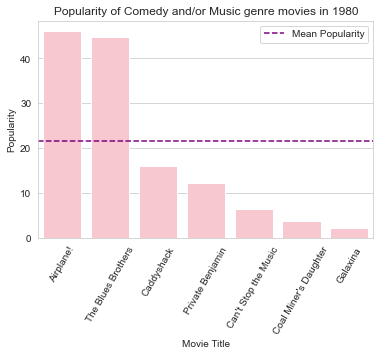

In [61]:
# Set the plot style
sns.set_style('whitegrid')

fig, ax = plt.subplots()

# Plot the budget bars
sns.barplot(x= 'title', y='popularity', data=joined_df, color= 'pink', ax=ax)

# Calculate the mean popularity
mean_popularity = df[df.release_year == 1980].popularity.mean()

# Add the mean popularity line
ax.axhline(mean_popularity, color='purple', linestyle='--', label='Mean Popularity')


# Add labels and title
ax.set_xlabel('Movie Title')
ax.set_ylabel('Popularity')
ax.set_title('Popularity of Comedy and/or Music genre movies in 1980')

#Set axis labels rotation
plt.xticks(rotation=60) 

#Add a legend
plt.legend()

# Display the chart
plt.show()

##### From the graph, movie 'Can't stop the music' stands in the 5th place out of 7 by popularity. It is also way behind the mean (~21.5) movie popularity for the year 1980.

### Conclusion: 
##### To answer the question 'Are woman-dirceted movies less popular?' this dataset in insufficient to determine the effects of being a woman director.
##### However, having the historical context and the graph above, I can conclude that in this dataset woman-directed Comedy and/or Music genre movie from the 1980 was less popular and bellow the mean popularity compared to the rest.

## 5. Do women directed movies receive less budget? What about revenue?

##### Now I investigate the latest woman-directed movie to see how it compares with non-woman directed movies in terms of budget and revenue.

### Looking of the last woman-directed movie

In [41]:
# The first condition checks if the values in the 'is_woman_director' column are equal to 1, indicating a woman director.
# The second condition checks if the values in the 'release_year' column are equal to 2016.
# Both conditions must be met.
df[(df.is_woman_director == 1) & (df.release_year == 2016)]
#In this dataset, according to release date the last movie, directed by a woman was in 2016-06-12, 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,extracted_genres,extracted_production_companies,extracted_production_countries,extracted_keywords,extracted_spoken_languages,is_woman_director,release_year
152,145000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.kungfupanda.com/,140300,"[{""id"": 478, ""name"": ""china""}, {""id"": 779, ""na...",en,Kung Fu Panda 3,"Continuing his ""legendary adventures of awesom...",56.747978,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,Kung Fu Panda 3,6.7,1603,"[Action, Adventure, Animation, Comedy, Family]","[Twentieth Century Fox Film Corporation, Dream...","[China, United States of America]","[china, martial arts, kung fu, village, panda,...",[English],1,2016
1770,27000000,"[{""id"": 53, ""name"": ""Thriller""}]",NaN,303858,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 1589, ""na...",en,Money Monster,Financial TV host Lee Gates and his producer P...,38.279458,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""na...",...,Money Monster,6.5,1068,[Thriller],"[TriStar Pictures, Sony Pictures Releasing, Sm...",[United States of America],"[bomb, sniper, tv show, hostage drama, police,...",[English],1,2016
2035,0,"[{""id"": 53, ""name"": ""Thriller""}]",NaN,205588,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Our Kind of Traitor,A young Oxford academic and his attorney girlf...,10.547959,"[{""name"": ""StudioCanal"", ""id"": 694}, {""name"": ...",...,Our Kind of Traitor,6.0,160,[Thriller],"[StudioCanal, Film4, Anton Capital Entertainme...","[France, United Kingdom]","[based on novel, woman director]","[Pусский, English, Français]",1,2016
2109,20000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.mebeforeyoumovie.net,296096,"[{""id"": 392, ""name"": ""england""}, {""id"": 818, ""...",en,Me Before You,A small town girl is caught between dead-end j...,53.161905,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,Me Before You,7.6,2562,"[Drama, Romance]","[New Line Cinema, Sunswept Entertainment, Metr...",[United States of America],"[england, based on novel, depression, small to...",[English],1,2016
2734,16000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.miraclesfromheaven-movie.com/,339984,"[{""id"": 2618, ""name"": ""miracle""}, {""id"": 5950,...",en,Miracles from Heaven,A faith based movie. A young girl suffering fr...,10.248439,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""na...",...,Miracles from Heaven,6.7,186,[Drama],"[TriStar Pictures, Sony Pictures Entertainment]",[United States of America],"[miracle, christian, cure, woman director, acc...",[English],1,2016


##### The last movie with a keyword woman-director is 'Me Before You' 2016, the main production company - New Line Cinema.

##### To comapare the budgets of movies it fair to look at movies, produced by the same company, since the disperion between different companies' budgets would effect the results.

### Finding all New Line Cinema/Productions movies from 2016

In [354]:
# Filter the DataFrame 'df' for rows where: 'release_year' is 2016, 'is_woman_director' is 0 (no woman director),
# 'extracted_production_companies' contains 'New Line' in any of the company names.

# The resulting DataFrame includes movies from 2016 without a woman director, but with 'New Line' in the production company names.
df[(df.release_year == 2016) & (df.is_woman_director == 0) & (df['extracted_production_companies'].apply(lambda x: any('New Line' in company for company in x)))]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_production_companies,extracted_production_countries,extracted_keywords,extracted_spoken_languages,release_year,is_woman_director
914,50000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",http://www.centralintelligencemovie.com/,302699,"[{""id"": 470, ""name"": ""spy""}, {""id"": 591, ""name...",en,Central Intelligence,After he reunites with an old pal through Face...,45.318703,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-06-15,216972543,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Saving the world takes a little Hart and a big...,Central Intelligence,6.2,1650,"[Action, Comedy]","[New Line Cinema, Universal Pictures, Bluegras...",[United States of America],"[spy, cia, espionage, high school reunion, ref...",[English],2016,0
1160,40000000,"[{""id"": 27, ""name"": ""Horror""}]",http://www.warnerbros.com/conjuring-2,259693,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,The Conjuring 2,Lorraine and Ed Warren travel to north London ...,68.794673,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2016-05-13,320170008,134.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The next true story from the case files of Ed ...,The Conjuring 2,7.0,1949,[Horror],"[New Line Cinema, Dune Entertainment, The Safr...","[Canada, United States of America]","[london england, england, 1970s, spirit, singl...",[English],2016,0
1335,38000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://howtobesinglemovie.com/,259694,"[{""id"": 242, ""name"": ""new york""}, {""id"": 818, ...",en,How to Be Single,New York City is full of lonely hearts seeking...,46.078371,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-01-21,112343513,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Welcome to the party,How to Be Single,5.9,1201,"[Comedy, Romance]","[New Line Cinema, Flower Films, Metro-Goldwyn-...",[United States of America],"[new york, based on novel, one-night stand, si...",[English],2016,0
2579,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",http://keanumovie.com/,342521,"[{""id"": 2708, ""name"": ""hitman""}, {""id"": 3688, ...",en,Keanu,Friends hatch a plot to retrieve a stolen cat ...,18.268009,"[{""name"": ""New Line Cinema"", ""id"": 12}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-04-21,20566327,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Kitten, please.",Keanu,6.0,421,"[Action, Comedy]",[New Line Cinema],[United States of America],"[hitman, strip club, african american, gangste...",[English],2016,0
3558,4900000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.lightsoutmovie.com/,345911,"[{""id"": 236, ""name"": ""suicide""}, {""id"": 3762, ...",en,Lights Out,"When Rebecca left home, she thought she left h...",48.170508,"[{""name"": ""New Line Productions"", ""id"": 8781},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-21,44107032,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Lights Out,6.3,1129,"[Horror, Thriller]","[New Line Productions, Matter Productions, Ato...",[United States of America],"[suicide, darkness, basement, based on short s...",[English],2016,0


##### There are 6 movies in total, produced by New Line Cinema/Productions in 2016. I further investigate their budgets and revenue.

### Comapring the budget and revenue of woman and non-woman directed New Line Cinema/Productions movies

##### At first I include all 6 movies in a new dataset.

In [43]:
df_plot1 = df[['original_title', 'budget', 'revenue']][(df.id == 345911) | (df.id == 342521) | (df.id == 259694) | (df.id == 259693) | (df.id == 302699) | (df.id == 296096)]

In [44]:
# Reshape the DataFrame 'df_plot1' using the 'pd.melt' function.
# The 'id_vars' parameter is set to "original_title", indicating that the column "original_title" will be kept as an identifier variable.
# The resulting DataFrame 'df_plot11' has a "variable" column containing the column names of 'df_plot1' and a "value" column containing the corresponding values.

# Sort the reshaped DataFrame 'df_plot11' by the "value" column in ascending order.
df_plot11 = pd.melt(df_plot1, id_vars = "original_title").sort_values(by='value', ascending=True)

##### Chaning the column names for better readability.

In [56]:
#Adjust column names
df_plot11.rename(columns = {'original_title' : 'Title', 'variable' : 'Budget/Revenue', 'value' : 'Hundred Millions USD'}, inplace = True)

##### Plotting the budget and revenue of all New Lines Cinema/Productions movies from 2016.

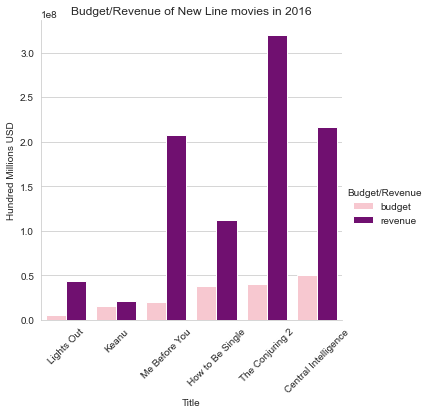

In [55]:
# Create a categorical plot using seaborn's catplot.
sns.set_style('whitegrid')
plot = sns.catplot(x= 'Title',# Set the x-axis as 'Title'
                   y='Hundred Millions USD', # Set the y-axis as 'Hundred Millions USD' (budget)
                   hue = 'Budget/Revenue', # Set the hue as 'Budget/Revenue'.
                   data=df_plot11, # The data is taken from the DataFrame 'df_plot11'.
                   kind='bar', # Specify the kind of plot as 'bar'.
                   palette=['pink', 'purple']) # Set the palette parameter to a list of colors
 
# Set the title
plt.title('Budget/Revenue of New Line movies in 2016')

# Rotate x-axis labels
plot.set_xticklabels(rotation=45)

# Show the plot
plt.show()



##### From the graph 'Me Before you" had the 3rd lowest budget out of all New Line movies in 2016. More than twice lower than the highest budget movie - Central Intelligence. Interestingly, their revenue is almost the same.

### Conclusion 
##### The answer to the questions 'Do woman-directed movies receive less budget? What about revenue?' cannot be generalized based on these findings, since again it might be the case that not all woman-directed movies had a keyword of a kind and there might be some other underlying factors, determining the budget.

##### However, in this dataset the latest woman-directed New Line movie received more than twice (40%) lower budget, compared to the highest budget New Line movie in 2016. Despite the lower budget, it managed to produce almost the same revenue. 
##### Studies on gender dispension in movie industry suggest that woman directors tend to receive 63% less budget between years of 2010 and 2015. It is evident, that women are not included and trusted enougth to receive fair budgets, despice them beinging capable to generate comepetitive revenue.

[Source](https://www.hollywoodreporter.com/news/general-news/study-films-directed-by-women-907229/)